In [1]:
from IPython.core.display import display, HTML
display(HTML('<style>.container { width: 98% !important }</style>'))

In [2]:
import joblib
from datetime import timedelta
import pandas as pd
from sklearn.preprocessing import normalize
import tensorflow as tf
import tensorflow_docs as tfdocs
import tensorflow_docs.plots

pd.set_option('display.max_rows', 10000)

In [3]:
from utilities import *

In [4]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [5]:
ble = read_ble('../Data/ble.csv')
pin = read_pin('../Data/pin.csv')
test_pin = read_pin('../Data/testPin.csv')

In [6]:
def read_stationary_data(filename):
    data = read_data(filename)
    data = data.set_index('time').groupby([pd.Grouper('location'), pd.Grouper(freq='100ms')]).mean()
    data = data.groupby('location').head(500)
    data = data.reset_index(0)
    data["X"] = data["location"].apply(lambda x: pin[x]["X"] if x[0] == 'V' else test_pin[x]["X"])
    data["Y"] = data["location"].apply(lambda x: pin[x]["Y"] if x[0] == 'V' else test_pin[x]["Y"])
    return data[scanners + ['X', 'Y']]

In [7]:
data_1 = read_stationary_data('../Data/rssi5.csv')
data_2 = read_stationary_data('../Data/rssi_2.csv')

All beacons: ['0117C55D14E4']
Selecting all
All beacons: ['0117C55D14E4']
Selecting all


In [8]:
data = pd.concat([data_1, data_2], axis=0, sort=True)
data.sort_index(inplace=True)

In [9]:
data.describe()

,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C,X,Y
count,2794.000000,2746.000000,2230.000000,3244.000000,2859.000000,3090.000000,3205.000000,3220.000000,4306.000000,1937.000000,3141.000000,2772.00000,3477.000000,3278.000000,3127.000000,1807.000000,2950.000000,21000.000000,21000.000000
mean,-73.595055,-74.895545,-77.894395,-73.190942,-73.106943,-74.142665,-75.004150,-74.730528,-76.623159,-78.136035,-76.211100,-72.01918,-69.492091,-77.444903,-74.198769,-81.816270,-75.854096,17.029472,8.488740
std,8.649248,7.609539,6.911076,8.641124,6.755587,8.742489,8.817217,8.985018,11.229760,10.275986,10.096149,7.63613,7.690721,9.566818,8.316653,8.738606,8.451251,7.741433,2.773144
min,-97.000000,-98.000000,-98.000000,-98.000000,-96.000000,-98.000000,-98.000000,-97.000000,-98.000000,-98.000000,-98.000000,-97.00000,-96.000000,-98.000000,-98.000000,-98.000000,-98.000000,5.180690,5.121330
25%,-80.000000,-80.000000,-82.000000,-80.000000,-78.000000,-80.750000,-82.000000,-82.000000,-86.000000,-86.000000,-84.000000,-77.00000,-75.000000,-86.000000,-80.000000,-90.000000,-82.000000,10.162500,5.297530
50%,-72.000000,-75.000000,-77.000000,-73.000000,-72.000000,-73.000000,-75.000000,-73.250000,-77.000000,-79.000000,-75.000000,-72.00000,-68.000000,-76.000000,-75.000000,-82.000000,-75.000000,17.173201,8.203950
75%,-68.000000,-69.000000,-73.000000,-66.000000,-68.000000,-66.541667,-69.000000,-68.000000,-70.000000,-69.000000,-67.000000,-67.00000,-64.000000,-70.000000,-68.000000,-74.750000,-69.000000,23.169100,11.717700
max,-58.000000,-63.000000,-62.000000,-58.000000,-59.000000,-55.000000,-54.000000,-56.000000,-54.000000,-58.000000,-60.000000,-55.00000,-54.000000,-58.000000,-56.000000,-67.000000,-60.000000,29.689400,12.253700


In [10]:
test_1 = read_stationary_data('../Data/testRssi.csv')
test_2 = read_stationary_data('../Data/testRssi_2.csv')

All beacons: ['0117C55D14E4']
Selecting all
All beacons: ['0117C55D14E4']
Selecting all


In [11]:
test = pd.concat([test_1, test_2], axis=0, sort=True)
test.sort_index(inplace=True)

In [12]:
test.describe()

,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C,X,Y
count,1605.000000,1582.000000,1370.000000,1640.000000,1755.000000,2103.000000,1816.000000,1627.000000,2022.000000,1212.000000,1990.000000,1713.000000,1874.000000,1670.00000,1599.000000,1222.000000,1526.000000,11544.000000,11544.000000
mean,-73.723832,-75.277497,-77.856813,-75.850711,-73.108072,-69.879894,-74.699615,-75.833231,-80.191024,-78.575083,-76.758157,-72.809691,-71.598364,-75.95500,-77.499781,-82.504774,-74.901387,16.988162,9.043439
std,9.180742,8.024775,5.899071,7.445389,7.824650,10.320480,8.072290,8.950850,7.435087,10.471802,8.915285,7.422493,7.085290,10.37003,8.017989,7.952286,8.640189,7.402813,2.485528
min,-96.000000,-96.000000,-96.000000,-98.000000,-97.000000,-98.000000,-98.000000,-98.000000,-97.000000,-98.000000,-98.000000,-94.000000,-96.000000,-98.00000,-98.000000,-97.000000,-98.000000,5.626103,4.554205
25%,-81.000000,-80.000000,-82.000000,-80.000000,-77.500000,-79.000000,-81.000000,-84.000000,-87.000000,-88.000000,-84.000000,-78.000000,-76.000000,-84.00000,-84.000000,-89.000000,-80.000000,10.191480,6.593112
50%,-72.000000,-75.000000,-77.000000,-75.000000,-73.000000,-67.000000,-73.000000,-74.000000,-80.000000,-79.000000,-74.000000,-73.000000,-70.000000,-73.00000,-77.000000,-84.000000,-74.000000,18.790348,9.659024
75%,-66.000000,-70.000000,-74.000000,-71.000000,-67.000000,-62.000000,-67.000000,-67.000000,-73.000000,-68.000000,-69.625000,-68.000000,-66.000000,-67.00000,-71.000000,-75.000000,-69.000000,23.355726,10.139037
max,-55.000000,-58.000000,-64.000000,-60.000000,-59.000000,-51.000000,-62.000000,-62.000000,-66.000000,-56.000000,-62.000000,-55.000000,-56.000000,-61.00000,-64.000000,-68.000000,-55.000000,29.934250,12.177943


In [13]:
def impute(data):
    data.update(data.rolling('5s').mean())
    data.ffill(inplace=True)

In [14]:
def linear_impute(data):
    for s in scanners:
        dx = data['X'] - ble[s]['X']
        dy = data['Y'] - ble[s]['Y']
        d = np.sqrt(np.square(dy) + np.square(dx))
        reg = joblib.load('../Models/linear_distance_models_2/{}.joblib'.format(s))
        ss = pd.Series(reg.predict(d.values.reshape((-1, 1))))
        ss.index = data.index
        data[s].fillna(ss, inplace=True)

In [15]:
impute(data)
linear_impute(data)
data[scanners] = normalize(data[scanners] + 100)

In [16]:
data.describe()

,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C,X,Y
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,0.232224,0.245172,0.224435,0.251456,0.264938,0.244952,0.232357,0.216514,0.169446,0.163660,0.190966,0.275224,0.295420,0.168108,0.252246,0.135616,0.226043,17.029472,8.488740
std,0.087463,0.072168,0.064032,0.074718,0.056914,0.087763,0.085093,0.093266,0.110105,0.101210,0.107802,0.058853,0.061135,0.110046,0.084486,0.090234,0.083324,7.741433,2.773144
min,0.052401,0.033581,0.047320,0.022111,0.058064,0.022152,0.065454,0.038485,0.020498,0.020215,0.020085,0.053953,0.081449,0.005262,0.024056,0.019260,0.026985,5.180690,5.121330
25%,0.163126,0.196279,0.181904,0.194972,0.223585,0.178314,0.165234,0.149787,0.077439,0.084881,0.108138,0.237976,0.253471,0.073746,0.202960,0.069222,0.158555,10.162500,5.297530
50%,0.227289,0.245328,0.223367,0.251872,0.263243,0.240881,0.215241,0.209011,0.132118,0.137479,0.155785,0.273832,0.294953,0.125535,0.251465,0.095522,0.212647,17.173201,8.203950
75%,0.299424,0.299529,0.268622,0.312671,0.311806,0.306647,0.283487,0.264848,0.245583,0.220223,0.258091,0.310430,0.342293,0.245954,0.302722,0.187065,0.279115,23.169100,11.717700
max,0.476895,0.409007,0.389450,0.413882,0.446418,0.466400,0.482848,0.467214,0.491600,0.473003,0.460917,0.471639,0.447961,0.453002,0.463498,0.447134,0.435409,29.689400,12.253700


In [17]:
impute(test)
linear_impute(test)
test[scanners] = normalize(test[scanners] + 100)

In [18]:
test.describe()

,C400A2E19293,CD4533FFC0E1,D2B6503554D7,DB8B36A69C56,DD697EA75B68,DF231643E227,E13B805C6CB0,E43355CA8B96,E6D9D20DD197,E8FD0B453DC4,E96AF2C858BA,EC72840D9AD3,F1307ECB3B90,F1EDAF28E08A,F69A86823B96,FB2EE01C18CE,FDAE5980F28C,X,Y
count,11544.000000,11544.000000,11544.000000,11544.000000,11544.000000,11544.000000,11544.000000,11544.000000,11544.000000,11544.000000,11544.000000,11544.000000,11544.000000,11544.000000,11544.000000,11544.000000,11544.000000,11544.000000,11544.000000
mean,0.238275,0.243037,0.224177,0.241076,0.267010,0.274910,0.234151,0.213973,0.156520,0.175599,0.188074,0.273510,0.286576,0.162538,0.223609,0.133979,0.228354,16.988162,9.043439
std,0.092408,0.080003,0.057780,0.069110,0.068457,0.115116,0.091300,0.096339,0.085806,0.104497,0.107388,0.053961,0.060105,0.128103,0.084412,0.084639,0.092272,7.402813,2.485528
min,0.067921,0.038731,0.037366,0.063833,0.038500,0.031367,0.034582,0.024384,0.037425,0.021908,0.031231,0.112120,0.117517,0.007093,0.021191,0.028069,0.022171,5.626103,4.554205
25%,0.155185,0.202035,0.191974,0.189092,0.225700,0.179595,0.159882,0.135506,0.097427,0.101722,0.093360,0.239298,0.241047,0.053286,0.160365,0.070072,0.156385,10.191480,6.593112
50%,0.232761,0.250574,0.228527,0.242596,0.271153,0.227001,0.220976,0.205130,0.133510,0.138343,0.159449,0.267075,0.293436,0.113221,0.220874,0.102580,0.233622,18.790348,9.659024
75%,0.319793,0.295924,0.257159,0.284685,0.316926,0.378761,0.313132,0.283671,0.224823,0.252863,0.290257,0.305538,0.334933,0.258909,0.305274,0.181154,0.294933,23.355726,10.139037
max,0.459777,0.442748,0.400496,0.392098,0.423184,0.542102,0.418011,0.454747,0.413665,0.448767,0.423035,0.458778,0.425639,0.455271,0.418858,0.359173,0.420113,29.934250,12.177943


In [19]:
def create_window(dataset, win_size, start_index=0, end_index=None):
    data = []
    labels = []

    start_index = start_index + win_size
    if end_index is None:
        end_index = len(dataset)

    for i in range(start_index, end_index, win_size):
        indices = range(i-win_size, i)
        slices = dataset.iloc[indices]
        if slices.index.max() - slices.index.min() < timedelta(milliseconds=win_size * 200):
            data.append(slices[scanners].values)
            labels.append(dataset[['X', 'Y']].iloc[i].values)
    return np.array(data), np.array(labels)

In [20]:
win_size = 5
X, y = create_window(data, win_size)

In [21]:
X.shape

(4150, 5, 17)

In [22]:
X_test, y_test = create_window(test, win_size)

In [23]:
msk = np.random.rand(len(X)) < 0.8
X_train, y_train = X[msk], y[msk]
X_validation, y_validation = X[~msk], y[~msk]

In [24]:
X_train.shape

(3320, 5, 17)

In [25]:
y_train.shape

(3320, 2)

In [26]:
batch_size = 32
ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
ds = ds.batch(batch_size).repeat()

In [27]:
ds_validation = tf.data.Dataset.from_tensor_slices((X_validation, y_validation))
ds_validation = ds_validation.batch(batch_size)

In [28]:
ds_test = tf.data.Dataset.from_tensor_slices((X_test, y_test))
ds_test = ds_test.batch(batch_size)

In [29]:
optimizer = tf.keras.optimizers.Adam(0.00001)
loss = "mse"
metrics = ["mae", "mse"]
batch_size = 32
epochs = 10000

callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=300, monitor='val_loss')
]

inputs = tf.keras.Input(shape=(win_size, 17))
flatten = tf.keras.layers.Flatten()(inputs)

x = tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(flatten)
x = tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(x)
x = tf.keras.layers.Dense(1)(x)

y = tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(flatten)
y = tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(y)
y = tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(y)
y = tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(y)
y = tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(y)
y = tf.keras.layers.Dense(1)(y)

outputs = tf.keras.layers.Concatenate(axis=1)([x, y])

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [30]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 5, 17)]      0                                            
__________________________________________________________________________________________________
flatten (Flatten)               (None, 85)           0           input_1[0][0]                    
__________________________________________________________________________________________________
dense (Dense)                   (None, 256)          22016       flatten[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 256)          22016       flatten[0][0]                    
______________________________________________________________________________________________

In [31]:
history = model.fit(ds, epochs=epochs, steps_per_epoch=X_train.shape[0] // batch_size, validation_data=ds_test, callbacks=callbacks)

Train for 103 steps, validate for 71 steps
Epoch 1/10000
103/103 [==============================] - 1s 14ms/step - loss: 212.4050 - mae: 12.6205 - mse: 211.5106 - val_loss: 213.8581 - val_mae: 12.9322 - val_mse: 213.8238
Epoch 2/10000
103/103 [==============================] - 0s 3ms/step - loss: 210.4157 - mae: 12.5268 - mse: 209.2093 - val_loss: 211.5571 - val_mae: 12.8402 - val_mse: 211.5255
Epoch 3/10000
103/103 [==============================] - 0s 3ms/step - loss: 207.5860 - mae: 12.4163 - mse: 206.3860 - val_loss: 208.8301 - val_mae: 12.7282 - val_mse: 208.8009
Epoch 4/10000
103/103 [==============================] - 0s 2ms/step - loss: 204.0796 - mae: 12.2786 - mse: 202.8861 - val_loss: 205.2520 - val_mae: 12.5827 - val_mse: 205.2224
Epoch 5/10000
103/103 [==============================] - 0s 3ms/step - loss: 199.8517 - mae: 12.0993 - mse: 198.6657 - val_loss: 200.1261 - val_mae: 12.3764 - val_mse: 200.0909
Epoch 6/10000
103/103 [==============================] - 0s 2ms/step - 

103/103 [==============================] - 0s 2ms/step - loss: 16.4638 - mae: 3.2138 - mse: 15.7625 - val_loss: 12.6907 - val_mae: 2.9071 - val_mse: 11.9540
Epoch 49/10000
103/103 [==============================] - 0s 2ms/step - loss: 15.8775 - mae: 3.1579 - mse: 15.1789 - val_loss: 12.1596 - val_mae: 2.8458 - val_mse: 11.4275
Epoch 50/10000
103/103 [==============================] - 0s 2ms/step - loss: 15.3028 - mae: 3.1046 - mse: 14.6067 - val_loss: 11.6297 - val_mae: 2.7829 - val_mse: 10.9016
Epoch 51/10000
103/103 [==============================] - 0s 2ms/step - loss: 14.7305 - mae: 3.0510 - mse: 14.0370 - val_loss: 11.1007 - val_mae: 2.7181 - val_mse: 10.3768
Epoch 52/10000
103/103 [==============================] - 0s 2ms/step - loss: 14.0060 - mae: 2.9847 - mse: 13.3147 - val_loss: 10.5898 - val_mae: 2.6534 - val_mse: 9.8695
Epoch 53/10000
103/103 [==============================] - 0s 2ms/step - loss: 13.6391 - mae: 2.9328 - mse: 12.9507 - val_loss: 10.0938 - val_mae: 2.5883 - v

Epoch 97/10000
103/103 [==============================] - 0s 2ms/step - loss: 4.5661 - mae: 1.6238 - mse: 3.9617 - val_loss: 3.9030 - val_mae: 1.5013 - val_mse: 3.2829
Epoch 98/10000
103/103 [==============================] - 0s 2ms/step - loss: 4.5291 - mae: 1.6165 - mse: 3.9265 - val_loss: 3.8858 - val_mae: 1.4968 - val_mse: 3.2682
Epoch 99/10000
103/103 [==============================] - 0s 2ms/step - loss: 4.4994 - mae: 1.6085 - mse: 3.8986 - val_loss: 3.8693 - val_mae: 1.4926 - val_mse: 3.2541
Epoch 100/10000
103/103 [==============================] - 0s 2ms/step - loss: 4.3951 - mae: 1.5879 - mse: 3.7959 - val_loss: 3.8536 - val_mae: 1.4887 - val_mse: 3.2409
Epoch 101/10000
103/103 [==============================] - 0s 2ms/step - loss: 4.3758 - mae: 1.5820 - mse: 3.7783 - val_loss: 3.8376 - val_mae: 1.4847 - val_mse: 3.2271
Epoch 102/10000
103/103 [==============================] - 0s 2ms/step - loss: 4.3639 - mae: 1.5781 - mse: 3.7682 - val_loss: 3.8205 - val_mae: 1.4806 - val_m

103/103 [==============================] - 0s 3ms/step - loss: 3.3349 - mae: 1.2748 - mse: 2.7937 - val_loss: 3.2016 - val_mae: 1.2792 - val_mse: 2.6586
Epoch 146/10000
103/103 [==============================] - 0s 2ms/step - loss: 3.3184 - mae: 1.2671 - mse: 2.7781 - val_loss: 3.2002 - val_mae: 1.2777 - val_mse: 2.6580
Epoch 147/10000
103/103 [==============================] - 0s 3ms/step - loss: 3.3586 - mae: 1.2744 - mse: 2.8192 - val_loss: 3.1975 - val_mae: 1.2761 - val_mse: 2.6562
Epoch 148/10000
103/103 [==============================] - 0s 2ms/step - loss: 3.3732 - mae: 1.2737 - mse: 2.8347 - val_loss: 3.1956 - val_mae: 1.2746 - val_mse: 2.6550
Epoch 149/10000
103/103 [==============================] - 0s 2ms/step - loss: 3.3573 - mae: 1.2673 - mse: 2.8196 - val_loss: 3.1952 - val_mae: 1.2738 - val_mse: 2.6553
Epoch 150/10000
103/103 [==============================] - 0s 2ms/step - loss: 3.3607 - mae: 1.2683 - mse: 2.8239 - val_loss: 3.1958 - val_mae: 1.2735 - val_mse: 2.6566
Ep

103/103 [==============================] - 0s 2ms/step - loss: 3.0048 - mae: 1.1613 - mse: 2.4913 - val_loss: 3.0790 - val_mae: 1.2553 - val_mse: 2.5645
Epoch 194/10000
103/103 [==============================] - 0s 2ms/step - loss: 3.0561 - mae: 1.1746 - mse: 2.5431 - val_loss: 3.0775 - val_mae: 1.2547 - val_mse: 2.5635
Epoch 195/10000
103/103 [==============================] - 0s 2ms/step - loss: 3.0687 - mae: 1.1771 - mse: 2.5560 - val_loss: 3.0764 - val_mae: 1.2540 - val_mse: 2.5627
Epoch 196/10000
103/103 [==============================] - 0s 2ms/step - loss: 3.0635 - mae: 1.1760 - mse: 2.5511 - val_loss: 3.0756 - val_mae: 1.2531 - val_mse: 2.5624
Epoch 197/10000
103/103 [==============================] - 0s 2ms/step - loss: 3.0648 - mae: 1.1778 - mse: 2.5528 - val_loss: 3.0751 - val_mae: 1.2523 - val_mse: 2.5623
Epoch 198/10000
103/103 [==============================] - 0s 2ms/step - loss: 3.0561 - mae: 1.1743 - mse: 2.5444 - val_loss: 3.0749 - val_mae: 1.2517 - val_mse: 2.5625
Ep

103/103 [==============================] - 0s 2ms/step - loss: 2.8920 - mae: 1.1263 - mse: 2.3890 - val_loss: 3.0833 - val_mae: 1.2401 - val_mse: 2.5797
Epoch 242/10000
103/103 [==============================] - 0s 2ms/step - loss: 2.8829 - mae: 1.1223 - mse: 2.3800 - val_loss: 3.0863 - val_mae: 1.2401 - val_mse: 2.5825
Epoch 243/10000
103/103 [==============================] - 0s 2ms/step - loss: 2.8903 - mae: 1.1279 - mse: 2.3876 - val_loss: 3.0915 - val_mae: 1.2405 - val_mse: 2.5874
Epoch 244/10000
103/103 [==============================] - 0s 2ms/step - loss: 2.8439 - mae: 1.1114 - mse: 2.3411 - val_loss: 3.0985 - val_mae: 1.2414 - val_mse: 2.5942
Epoch 245/10000
103/103 [==============================] - 0s 2ms/step - loss: 2.8400 - mae: 1.1106 - mse: 2.3374 - val_loss: 3.1060 - val_mae: 1.2427 - val_mse: 2.6015
Epoch 246/10000
103/103 [==============================] - 0s 2ms/step - loss: 2.8540 - mae: 1.1160 - mse: 2.3516 - val_loss: 3.1133 - val_mae: 1.2441 - val_mse: 2.6086
Ep

103/103 [==============================] - 0s 2ms/step - loss: 2.7305 - mae: 1.0754 - mse: 2.2304 - val_loss: 3.0904 - val_mae: 1.2419 - val_mse: 2.5883
Epoch 290/10000
103/103 [==============================] - 0s 2ms/step - loss: 2.7335 - mae: 1.0771 - mse: 2.2335 - val_loss: 3.0846 - val_mae: 1.2414 - val_mse: 2.5827
Epoch 291/10000
103/103 [==============================] - 0s 2ms/step - loss: 2.7344 - mae: 1.0794 - mse: 2.2344 - val_loss: 3.0777 - val_mae: 1.2409 - val_mse: 2.5759
Epoch 292/10000
103/103 [==============================] - 0s 2ms/step - loss: 2.7301 - mae: 1.0779 - mse: 2.2301 - val_loss: 3.0710 - val_mae: 1.2405 - val_mse: 2.5695
Epoch 293/10000
103/103 [==============================] - 0s 2ms/step - loss: 2.7318 - mae: 1.0784 - mse: 2.2318 - val_loss: 3.0649 - val_mae: 1.2402 - val_mse: 2.5635
Epoch 294/10000
103/103 [==============================] - 0s 2ms/step - loss: 2.7311 - mae: 1.0791 - mse: 2.2311 - val_loss: 3.0593 - val_mae: 1.2402 - val_mse: 2.5582
Ep

103/103 [==============================] - 0s 2ms/step - loss: 2.6106 - mae: 1.0402 - mse: 2.1104 - val_loss: 3.0505 - val_mae: 1.2420 - val_mse: 2.5526
Epoch 338/10000
103/103 [==============================] - 0s 2ms/step - loss: 2.6037 - mae: 1.0380 - mse: 2.1035 - val_loss: 3.0499 - val_mae: 1.2412 - val_mse: 2.5518
Epoch 339/10000
103/103 [==============================] - 0s 2ms/step - loss: 2.6009 - mae: 1.0365 - mse: 2.1007 - val_loss: 3.0498 - val_mae: 1.2404 - val_mse: 2.5516
Epoch 340/10000
103/103 [==============================] - 0s 2ms/step - loss: 2.6034 - mae: 1.0387 - mse: 2.1031 - val_loss: 3.0506 - val_mae: 1.2394 - val_mse: 2.5522
Epoch 341/10000
103/103 [==============================] - 0s 2ms/step - loss: 2.6046 - mae: 1.0402 - mse: 2.1043 - val_loss: 3.0519 - val_mae: 1.2385 - val_mse: 2.5532
Epoch 342/10000
103/103 [==============================] - 0s 2ms/step - loss: 2.6041 - mae: 1.0414 - mse: 2.1038 - val_loss: 3.0536 - val_mae: 1.2376 - val_mse: 2.5547
Ep

103/103 [==============================] - 0s 2ms/step - loss: 2.5020 - mae: 1.0094 - mse: 2.0004 - val_loss: 3.1113 - val_mae: 1.2454 - val_mse: 2.6090
Epoch 386/10000
103/103 [==============================] - 0s 2ms/step - loss: 2.4990 - mae: 1.0087 - mse: 1.9973 - val_loss: 3.1055 - val_mae: 1.2443 - val_mse: 2.6032
Epoch 387/10000
103/103 [==============================] - 0s 2ms/step - loss: 2.4744 - mae: 1.0003 - mse: 1.9726 - val_loss: 3.0996 - val_mae: 1.2433 - val_mse: 2.5974
Epoch 388/10000
103/103 [==============================] - 0s 2ms/step - loss: 2.4834 - mae: 1.0035 - mse: 1.9816 - val_loss: 3.0956 - val_mae: 1.2426 - val_mse: 2.5934
Epoch 389/10000
103/103 [==============================] - 0s 2ms/step - loss: 2.4510 - mae: 0.9995 - mse: 1.9491 - val_loss: 3.0931 - val_mae: 1.2423 - val_mse: 2.5909
Epoch 390/10000
103/103 [==============================] - 0s 2ms/step - loss: 2.4844 - mae: 1.0042 - mse: 1.9825 - val_loss: 3.0917 - val_mae: 1.2422 - val_mse: 2.5895
Ep

103/103 [==============================] - 0s 3ms/step - loss: 2.3987 - mae: 0.9800 - mse: 1.8948 - val_loss: 3.0303 - val_mae: 1.2426 - val_mse: 2.5302
Epoch 434/10000
103/103 [==============================] - 0s 2ms/step - loss: 2.3895 - mae: 0.9755 - mse: 1.8856 - val_loss: 3.0289 - val_mae: 1.2423 - val_mse: 2.5288
Epoch 435/10000
103/103 [==============================] - 0s 2ms/step - loss: 2.3808 - mae: 0.9703 - mse: 1.8769 - val_loss: 3.0275 - val_mae: 1.2420 - val_mse: 2.5275
Epoch 436/10000
103/103 [==============================] - 0s 3ms/step - loss: 2.3775 - mae: 0.9706 - mse: 1.8735 - val_loss: 3.0266 - val_mae: 1.2417 - val_mse: 2.5267
Epoch 437/10000
103/103 [==============================] - 0s 2ms/step - loss: 2.3673 - mae: 0.9680 - mse: 1.8632 - val_loss: 3.0263 - val_mae: 1.2413 - val_mse: 2.5264
Epoch 438/10000
103/103 [==============================] - 0s 2ms/step - loss: 2.3542 - mae: 0.9646 - mse: 1.8500 - val_loss: 3.0261 - val_mae: 1.2409 - val_mse: 2.5262
Ep

103/103 [==============================] - 0s 2ms/step - loss: 2.2788 - mae: 0.9423 - mse: 1.7724 - val_loss: 3.1563 - val_mae: 1.2600 - val_mse: 2.6505
Epoch 482/10000
103/103 [==============================] - 0s 2ms/step - loss: 2.2898 - mae: 0.9447 - mse: 1.7834 - val_loss: 3.1553 - val_mae: 1.2599 - val_mse: 2.6495
Epoch 483/10000
103/103 [==============================] - 0s 2ms/step - loss: 2.2836 - mae: 0.9424 - mse: 1.7771 - val_loss: 3.1525 - val_mae: 1.2594 - val_mse: 2.6466
Epoch 484/10000
103/103 [==============================] - 0s 3ms/step - loss: 2.2941 - mae: 0.9479 - mse: 1.7876 - val_loss: 3.1477 - val_mae: 1.2583 - val_mse: 2.6418
Epoch 485/10000
103/103 [==============================] - 0s 2ms/step - loss: 2.2923 - mae: 0.9476 - mse: 1.7858 - val_loss: 3.1418 - val_mae: 1.2570 - val_mse: 2.6360
Epoch 486/10000
103/103 [==============================] - 0s 2ms/step - loss: 2.2708 - mae: 0.9426 - mse: 1.7642 - val_loss: 3.1353 - val_mae: 1.2556 - val_mse: 2.6295
Ep

103/103 [==============================] - 0s 2ms/step - loss: 2.1935 - mae: 0.9144 - mse: 1.6846 - val_loss: 3.0139 - val_mae: 1.2404 - val_mse: 2.5096
Epoch 530/10000
103/103 [==============================] - 0s 2ms/step - loss: 2.1913 - mae: 0.9141 - mse: 1.6823 - val_loss: 3.0119 - val_mae: 1.2403 - val_mse: 2.5076
Epoch 531/10000
103/103 [==============================] - 0s 2ms/step - loss: 2.1964 - mae: 0.9156 - mse: 1.6874 - val_loss: 3.0105 - val_mae: 1.2401 - val_mse: 2.5063
Epoch 532/10000
103/103 [==============================] - 0s 2ms/step - loss: 2.1909 - mae: 0.9131 - mse: 1.6818 - val_loss: 3.0096 - val_mae: 1.2400 - val_mse: 2.5054
Epoch 533/10000
103/103 [==============================] - 0s 2ms/step - loss: 2.1828 - mae: 0.9102 - mse: 1.6736 - val_loss: 3.0094 - val_mae: 1.2399 - val_mse: 2.5053
Epoch 534/10000
103/103 [==============================] - 0s 2ms/step - loss: 2.1854 - mae: 0.9115 - mse: 1.6761 - val_loss: 3.0095 - val_mae: 1.2396 - val_mse: 2.5053
Ep

103/103 [==============================] - 0s 2ms/step - loss: 2.1064 - mae: 0.8879 - mse: 1.5947 - val_loss: 3.1598 - val_mae: 1.2630 - val_mse: 2.6502
Epoch 578/10000
103/103 [==============================] - 0s 2ms/step - loss: 2.0868 - mae: 0.8811 - mse: 1.5750 - val_loss: 3.1503 - val_mae: 1.2608 - val_mse: 2.6408
Epoch 579/10000
103/103 [==============================] - 0s 2ms/step - loss: 2.0810 - mae: 0.8790 - mse: 1.5691 - val_loss: 3.1437 - val_mae: 1.2594 - val_mse: 2.6342
Epoch 580/10000
103/103 [==============================] - 0s 2ms/step - loss: 2.0836 - mae: 0.8814 - mse: 1.5717 - val_loss: 3.1407 - val_mae: 1.2589 - val_mse: 2.6311
Epoch 581/10000
103/103 [==============================] - 0s 2ms/step - loss: 2.1014 - mae: 0.8866 - mse: 1.5895 - val_loss: 3.1411 - val_mae: 1.2594 - val_mse: 2.6314
Epoch 582/10000
103/103 [==============================] - 0s 2ms/step - loss: 2.0998 - mae: 0.8861 - mse: 1.5878 - val_loss: 3.1435 - val_mae: 1.2603 - val_mse: 2.6337
Ep

103/103 [==============================] - 0s 2ms/step - loss: 2.0197 - mae: 0.8590 - mse: 1.5023 - val_loss: 2.9817 - val_mae: 1.2340 - val_mse: 2.4725
Epoch 626/10000
103/103 [==============================] - 0s 2ms/step - loss: 2.0144 - mae: 0.8573 - mse: 1.4999 - val_loss: 2.9822 - val_mae: 1.2340 - val_mse: 2.4730
Epoch 627/10000
103/103 [==============================] - 0s 2ms/step - loss: 2.0128 - mae: 0.8577 - mse: 1.4982 - val_loss: 2.9833 - val_mae: 1.2341 - val_mse: 2.4741
Epoch 628/10000
103/103 [==============================] - 0s 2ms/step - loss: 2.0038 - mae: 0.8526 - mse: 1.4892 - val_loss: 2.9846 - val_mae: 1.2342 - val_mse: 2.4753
Epoch 629/10000
103/103 [==============================] - 0s 2ms/step - loss: 1.9965 - mae: 0.8524 - mse: 1.4818 - val_loss: 2.9860 - val_mae: 1.2342 - val_mse: 2.4767
Epoch 630/10000
103/103 [==============================] - 0s 2ms/step - loss: 1.9708 - mae: 0.8448 - mse: 1.4560 - val_loss: 2.9879 - val_mae: 1.2341 - val_mse: 2.4785
Ep

103/103 [==============================] - 0s 2ms/step - loss: 1.9230 - mae: 0.8249 - mse: 1.4057 - val_loss: 3.1528 - val_mae: 1.2635 - val_mse: 2.6387
Epoch 674/10000
103/103 [==============================] - 0s 2ms/step - loss: 1.9248 - mae: 0.8275 - mse: 1.4076 - val_loss: 3.1560 - val_mae: 1.2644 - val_mse: 2.6418
Epoch 675/10000
103/103 [==============================] - 0s 2ms/step - loss: 1.9279 - mae: 0.8280 - mse: 1.4106 - val_loss: 3.1579 - val_mae: 1.2650 - val_mse: 2.6436
Epoch 676/10000
103/103 [==============================] - 0s 2ms/step - loss: 1.9049 - mae: 0.8198 - mse: 1.3875 - val_loss: 3.1609 - val_mae: 1.2659 - val_mse: 2.6465
Epoch 677/10000
103/103 [==============================] - 0s 2ms/step - loss: 1.8754 - mae: 0.8216 - mse: 1.3578 - val_loss: 3.1612 - val_mae: 1.2661 - val_mse: 2.6467
Epoch 678/10000
103/103 [==============================] - 0s 2ms/step - loss: 1.9236 - mae: 0.8275 - mse: 1.4061 - val_loss: 3.1577 - val_mae: 1.2654 - val_mse: 2.6432
Ep

103/103 [==============================] - 0s 2ms/step - loss: 1.8355 - mae: 0.7966 - mse: 1.3156 - val_loss: 2.9506 - val_mae: 1.2270 - val_mse: 2.4361
Epoch 722/10000
103/103 [==============================] - 0s 2ms/step - loss: 1.8456 - mae: 0.8010 - mse: 1.3256 - val_loss: 2.9510 - val_mae: 1.2273 - val_mse: 2.4366
Epoch 723/10000
103/103 [==============================] - 0s 2ms/step - loss: 1.8419 - mae: 0.7987 - mse: 1.3219 - val_loss: 2.9518 - val_mae: 1.2277 - val_mse: 2.4374
Epoch 724/10000
103/103 [==============================] - 0s 2ms/step - loss: 1.7933 - mae: 0.7840 - mse: 1.2732 - val_loss: 2.9533 - val_mae: 1.2282 - val_mse: 2.4389
Epoch 725/10000
103/103 [==============================] - 0s 2ms/step - loss: 1.7993 - mae: 0.7862 - mse: 1.2791 - val_loss: 2.9538 - val_mae: 1.2284 - val_mse: 2.4395
Epoch 726/10000
103/103 [==============================] - 0s 2ms/step - loss: 1.7923 - mae: 0.7839 - mse: 1.2720 - val_loss: 2.9535 - val_mae: 1.2283 - val_mse: 2.4391
Ep

103/103 [==============================] - 0s 2ms/step - loss: 1.7051 - mae: 0.7567 - mse: 1.1825 - val_loss: 3.0736 - val_mae: 1.2459 - val_mse: 2.5550
Epoch 770/10000
103/103 [==============================] - 0s 2ms/step - loss: 1.7176 - mae: 0.7571 - mse: 1.1949 - val_loss: 3.0851 - val_mae: 1.2483 - val_mse: 2.5664
Epoch 771/10000
103/103 [==============================] - 0s 2ms/step - loss: 1.7378 - mae: 0.7637 - mse: 1.2151 - val_loss: 3.0915 - val_mae: 1.2498 - val_mse: 2.5727
Epoch 772/10000
103/103 [==============================] - 0s 2ms/step - loss: 1.7558 - mae: 0.7673 - mse: 1.2331 - val_loss: 3.0970 - val_mae: 1.2510 - val_mse: 2.5781
Epoch 773/10000
103/103 [==============================] - 0s 2ms/step - loss: 1.7479 - mae: 0.7643 - mse: 1.2252 - val_loss: 3.1038 - val_mae: 1.2526 - val_mse: 2.5848
Epoch 774/10000
103/103 [==============================] - 0s 2ms/step - loss: 1.7532 - mae: 0.7670 - mse: 1.2304 - val_loss: 3.1113 - val_mae: 1.2543 - val_mse: 2.5922
Ep

103/103 [==============================] - 0s 2ms/step - loss: 1.6555 - mae: 0.7295 - mse: 1.1305 - val_loss: 2.9583 - val_mae: 1.2288 - val_mse: 2.4374
Epoch 818/10000
103/103 [==============================] - 0s 2ms/step - loss: 1.6628 - mae: 0.7328 - mse: 1.1378 - val_loss: 2.9519 - val_mae: 1.2276 - val_mse: 2.4310
Epoch 819/10000
103/103 [==============================] - 0s 2ms/step - loss: 1.6731 - mae: 0.7352 - mse: 1.1480 - val_loss: 2.9474 - val_mae: 1.2265 - val_mse: 2.4266
Epoch 820/10000
103/103 [==============================] - 0s 2ms/step - loss: 1.6729 - mae: 0.7356 - mse: 1.1477 - val_loss: 2.9443 - val_mae: 1.2256 - val_mse: 2.4235
Epoch 821/10000
103/103 [==============================] - 0s 2ms/step - loss: 1.6742 - mae: 0.7372 - mse: 1.1490 - val_loss: 2.9419 - val_mae: 1.2250 - val_mse: 2.4212
Epoch 822/10000
103/103 [==============================] - 0s 2ms/step - loss: 1.6698 - mae: 0.7348 - mse: 1.1446 - val_loss: 2.9398 - val_mae: 1.2245 - val_mse: 2.4192
Ep

103/103 [==============================] - 0s 2ms/step - loss: 1.5998 - mae: 0.7078 - mse: 1.0727 - val_loss: 2.9467 - val_mae: 1.2217 - val_mse: 2.4248
Epoch 866/10000
103/103 [==============================] - 0s 2ms/step - loss: 1.5984 - mae: 0.7059 - mse: 1.0712 - val_loss: 2.9561 - val_mae: 1.2234 - val_mse: 2.4339
Epoch 867/10000
103/103 [==============================] - 0s 2ms/step - loss: 1.5981 - mae: 0.7073 - mse: 1.0708 - val_loss: 2.9684 - val_mae: 1.2256 - val_mse: 2.4458
Epoch 868/10000
103/103 [==============================] - 0s 2ms/step - loss: 1.5829 - mae: 0.7009 - mse: 1.0556 - val_loss: 2.9860 - val_mae: 1.2290 - val_mse: 2.4631
Epoch 869/10000
103/103 [==============================] - 0s 2ms/step - loss: 1.5809 - mae: 0.6999 - mse: 1.0536 - val_loss: 3.0035 - val_mae: 1.2325 - val_mse: 2.4802
Epoch 870/10000
103/103 [==============================] - 0s 2ms/step - loss: 1.5907 - mae: 0.7035 - mse: 1.0633 - val_loss: 3.0196 - val_mae: 1.2356 - val_mse: 2.4961
Ep

103/103 [==============================] - 0s 2ms/step - loss: 1.5285 - mae: 0.6783 - mse: 0.9995 - val_loss: 3.0764 - val_mae: 1.2507 - val_mse: 2.5494
Epoch 914/10000
103/103 [==============================] - 0s 2ms/step - loss: 1.5259 - mae: 0.6767 - mse: 0.9968 - val_loss: 3.0680 - val_mae: 1.2491 - val_mse: 2.5409
Epoch 915/10000
103/103 [==============================] - 0s 2ms/step - loss: 1.5287 - mae: 0.6792 - mse: 0.9996 - val_loss: 3.0557 - val_mae: 1.2468 - val_mse: 2.5287
Epoch 916/10000
103/103 [==============================] - 0s 2ms/step - loss: 1.5295 - mae: 0.6795 - mse: 1.0004 - val_loss: 3.0422 - val_mae: 1.2443 - val_mse: 2.5153
Epoch 917/10000
103/103 [==============================] - 0s 2ms/step - loss: 1.5283 - mae: 0.6788 - mse: 0.9992 - val_loss: 3.0285 - val_mae: 1.2418 - val_mse: 2.5016
Epoch 918/10000
103/103 [==============================] - 0s 2ms/step - loss: 1.5257 - mae: 0.6776 - mse: 0.9965 - val_loss: 3.0149 - val_mae: 1.2394 - val_mse: 2.4880
Ep

103/103 [==============================] - 0s 2ms/step - loss: 1.4676 - mae: 0.6516 - mse: 0.9371 - val_loss: 2.9365 - val_mae: 1.2264 - val_mse: 2.4120
Epoch 962/10000
103/103 [==============================] - 0s 2ms/step - loss: 1.4672 - mae: 0.6519 - mse: 0.9366 - val_loss: 2.9393 - val_mae: 1.2267 - val_mse: 2.4146
Epoch 963/10000
103/103 [==============================] - 0s 2ms/step - loss: 1.4656 - mae: 0.6509 - mse: 0.9350 - val_loss: 2.9426 - val_mae: 1.2270 - val_mse: 2.4176
Epoch 964/10000
103/103 [==============================] - 0s 2ms/step - loss: 1.4635 - mae: 0.6500 - mse: 0.9330 - val_loss: 2.9463 - val_mae: 1.2274 - val_mse: 2.4210
Epoch 965/10000
103/103 [==============================] - 0s 2ms/step - loss: 1.4630 - mae: 0.6502 - mse: 0.9324 - val_loss: 2.9504 - val_mae: 1.2279 - val_mse: 2.4248
Epoch 966/10000
103/103 [==============================] - 0s 2ms/step - loss: 1.4600 - mae: 0.6482 - mse: 0.9294 - val_loss: 2.9548 - val_mae: 1.2284 - val_mse: 2.4289
Ep

103/103 [==============================] - 0s 2ms/step - loss: 1.4073 - mae: 0.6249 - mse: 0.8758 - val_loss: 3.1518 - val_mae: 1.2668 - val_mse: 2.6209
Epoch 1010/10000
103/103 [==============================] - 0s 2ms/step - loss: 1.4055 - mae: 0.6243 - mse: 0.8739 - val_loss: 3.1413 - val_mae: 1.2646 - val_mse: 2.6105
Epoch 1011/10000
103/103 [==============================] - 0s 2ms/step - loss: 1.3932 - mae: 0.6193 - mse: 0.8615 - val_loss: 3.1333 - val_mae: 1.2629 - val_mse: 2.6024
Epoch 1012/10000
103/103 [==============================] - 0s 2ms/step - loss: 1.4020 - mae: 0.6233 - mse: 0.8703 - val_loss: 3.1300 - val_mae: 1.2621 - val_mse: 2.5992
Epoch 1013/10000
103/103 [==============================] - 0s 2ms/step - loss: 1.3711 - mae: 0.6190 - mse: 0.8394 - val_loss: 3.1288 - val_mae: 1.2618 - val_mse: 2.5980
Epoch 1014/10000
103/103 [==============================] - 0s 2ms/step - loss: 1.3950 - mae: 0.6205 - mse: 0.8633 - val_loss: 3.1294 - val_mae: 1.2619 - val_mse: 2.59

103/103 [==============================] - 0s 2ms/step - loss: 1.3531 - mae: 0.5993 - mse: 0.8208 - val_loss: 2.9925 - val_mae: 1.2412 - val_mse: 2.4658
Epoch 1058/10000
103/103 [==============================] - 0s 2ms/step - loss: 1.3525 - mae: 0.6007 - mse: 0.8202 - val_loss: 2.9918 - val_mae: 1.2411 - val_mse: 2.4651
Epoch 1059/10000
103/103 [==============================] - 0s 2ms/step - loss: 1.3531 - mae: 0.6003 - mse: 0.8208 - val_loss: 2.9913 - val_mae: 1.2409 - val_mse: 2.4645
Epoch 1060/10000
103/103 [==============================] - 0s 2ms/step - loss: 1.3508 - mae: 0.5995 - mse: 0.8185 - val_loss: 2.9913 - val_mae: 1.2408 - val_mse: 2.4645
Epoch 1061/10000
103/103 [==============================] - 0s 2ms/step - loss: 1.3515 - mae: 0.5997 - mse: 0.8192 - val_loss: 2.9917 - val_mae: 1.2408 - val_mse: 2.4649
Epoch 1062/10000
103/103 [==============================] - 0s 2ms/step - loss: 1.3479 - mae: 0.5977 - mse: 0.8156 - val_loss: 2.9923 - val_mae: 1.2407 - val_mse: 2.46

103/103 [==============================] - 0s 2ms/step - loss: 1.3031 - mae: 0.5761 - mse: 0.7706 - val_loss: 3.2153 - val_mae: 1.2785 - val_mse: 2.6831
Epoch 1106/10000
103/103 [==============================] - 0s 2ms/step - loss: 1.3041 - mae: 0.5768 - mse: 0.7716 - val_loss: 3.2232 - val_mae: 1.2805 - val_mse: 2.6908
Epoch 1107/10000
103/103 [==============================] - 0s 2ms/step - loss: 1.3018 - mae: 0.5753 - mse: 0.7693 - val_loss: 3.2304 - val_mae: 1.2822 - val_mse: 2.6979
Epoch 1108/10000
103/103 [==============================] - 0s 2ms/step - loss: 1.3012 - mae: 0.5749 - mse: 0.7687 - val_loss: 3.2357 - val_mae: 1.2834 - val_mse: 2.7031
Epoch 1109/10000
103/103 [==============================] - 0s 2ms/step - loss: 1.3014 - mae: 0.5758 - mse: 0.7689 - val_loss: 3.2364 - val_mae: 1.2836 - val_mse: 2.7038
Epoch 1110/10000
103/103 [==============================] - 0s 2ms/step - loss: 1.2802 - mae: 0.5709 - mse: 0.7477 - val_loss: 3.2343 - val_mae: 1.2831 - val_mse: 2.70

103/103 [==============================] - 0s 2ms/step - loss: 1.2610 - mae: 0.5553 - mse: 0.7286 - val_loss: 3.0762 - val_mae: 1.2568 - val_mse: 2.5478
Epoch 1154/10000
103/103 [==============================] - 0s 2ms/step - loss: 1.2571 - mae: 0.5547 - mse: 0.7247 - val_loss: 3.0697 - val_mae: 1.2557 - val_mse: 2.5414


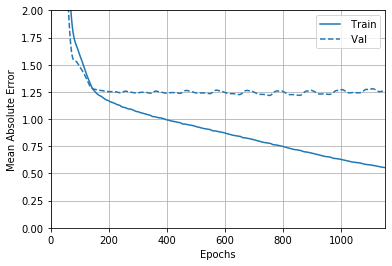

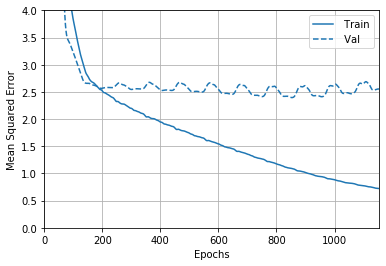

In [32]:
plt.figure()
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)
plotter.plot({"": history}, metric = "mae")
plt.ylim([0, 2])
plt.ylabel('Mean Absolute Error')

plt.figure()
plotter.plot({"": history}, metric = "mse")
plt.ylim([0, 4])
plt.ylabel('Mean Squared Error')

plt.show()

In [33]:
def average_distance_error(preds, y_test):
    return np.mean(np.sqrt(np.sum(np.square(preds - y_test), axis=1)))

830/1 - 0s - loss: 1.1951 - mae: 0.5864 - mse: 1.0378
Test loss: 1.5710576077541674
Mean absolute error: 0.58643246
Mean squared error: 1.0377624
Average distance error: 0.9778663285019977


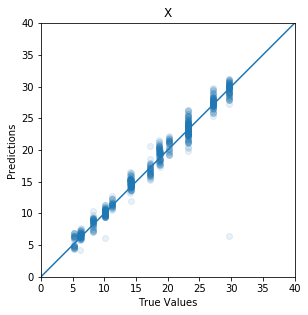

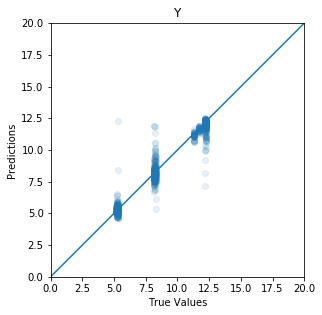

In [34]:
validation_scores = model.evaluate(X_validation, y_validation, verbose=2)
print("Test loss:", validation_scores[0])
print("Mean absolute error:", validation_scores[1])
print("Mean squared error:", validation_scores[2])

preds = model.predict(X_validation)
print("Average distance error:", average_distance_error(preds, y_validation))

fig = plt.figure(figsize=(10, 20))
lims = [0, 40]
ax1 = fig.add_subplot(121, aspect='equal', title='X', xlim=lims, ylim=lims, xlabel='True Values', ylabel='Predictions')
ax1.scatter(y_validation[:, 0], preds[:, 0], alpha=0.1)
ax1.plot(lims, lims)

fig = plt.figure(figsize=(10, 20))
lims = [0, 20]
ax1 = fig.add_subplot(121, aspect='equal', title='Y', xlim=lims, ylim=lims, xlabel='True Values', ylabel='Predictions')

ax1.scatter(y_validation[:, 1], preds[:, 1], alpha=0.1)
ax1.plot(lims, lims)

plt.show()

2254/1 - 0s - loss: 2.7624 - mae: 1.2557 - mse: 2.5414
Test loss: 3.0746780338812
Mean absolute error: 1.2557095
Mean squared error: 2.5413828
Average distance error: 2.051170952505532


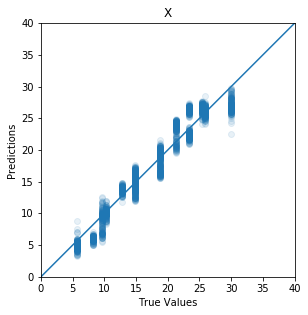

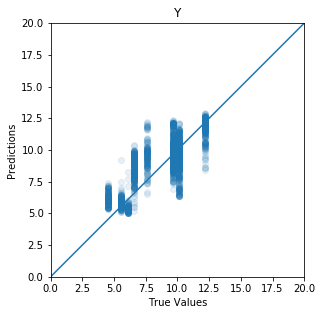

In [35]:
test_scores = model.evaluate(X_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Mean absolute error:", test_scores[1])
print("Mean squared error:", test_scores[2])

preds = model.predict(X_test)
print("Average distance error:", average_distance_error(preds, y_test))

fig = plt.figure(figsize=(10, 20))
lims = [0, 40]
ax1 = fig.add_subplot(121, aspect='equal', title='X', xlim=lims, ylim=lims, xlabel='True Values', ylabel='Predictions')
ax1.scatter(y_test[:, 0], preds[:, 0], alpha=0.1)
ax1.plot(lims, lims)

fig = plt.figure(figsize=(10, 20))
lims = [0, 20]
ax1 = fig.add_subplot(121, aspect='equal', title='Y', xlim=lims, ylim=lims, xlabel='True Values', ylabel='Predictions')

ax1.scatter(y_test[:, 1], preds[:, 1], alpha=0.1)
ax1.plot(lims, lims)

plt.show()

In [36]:
def cdf(preds, y_test):
    plt.figure(figsize=(10, 10))

    Z = np.sqrt(np.sum(np.square(preds - y_test), axis=1)).reshape(-1)
    N = Z.size

    X = np.sort(Z)
    F = np.array(range(N)) / float(N)
    plt.plot(X, F)
    plt.title('CDF of Euclidean Distance Error')
    plt.xlabel('Euclidean Distance Error (m)')
    plt.ylabel('Density')
    plt.show()

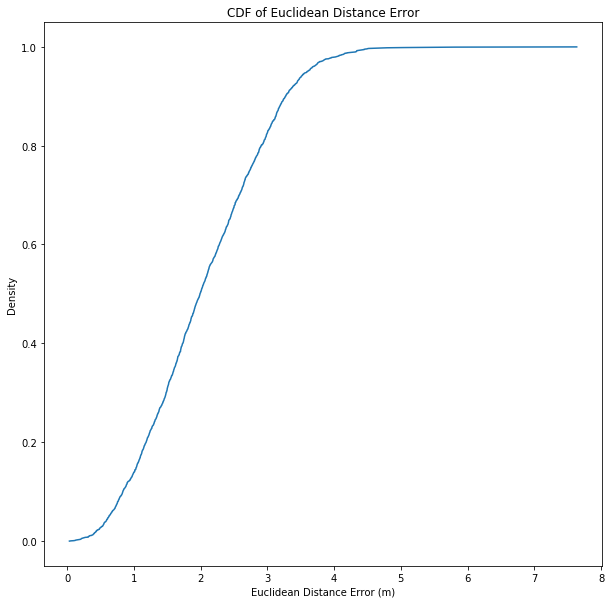

In [37]:
cdf(preds, y_test)

model.save('../Models/MLP_Timesteps_Stationary_W10.h5')

model.save_weights('../Models/MLP_Timesteps_Stationary_W10_weights.h5')